In [46]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

In [4]:
# process the dataset 
df=pd.read_csv(r'C:\Users\Joseph\Desktop\Python Scripts\data\Walmart_Store_sales.csv')

In [5]:
#change first row into a header/column titles
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
#convert the data type in the [Date] column from object type into datetime
from datetime import datetime
from dateutil.parser import parse

def parse_date(date_str):
    try:
        return parse(str(date_str))
    except ValueError:
        return None

df['Date'] = df['Date'].apply(parse_date)

print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358  

In [7]:
#double check to make sure the function changed it to the correct datetime format
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

**end of cleaning data and start of the actual statistics**

1) Which store had the maximum sales?

In [8]:
#finding which store has maximum sales
total_sales=df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

pd.DataFrame(total_sales).head(1)

,Weekly_Sales
Store,
20,301397792.0


2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [9]:
#Calculating standard deviation by store number
df_std=df.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=False)

pd.DataFrame(df_std).head()

,Weekly_Sales
Store,
14,317570.0
10,302262.0
20,275901.0
4,266201.0
13,265507.0


In [10]:
#Showing which store had the greatest standard deviation
pd.DataFrame(df_std).head(1)

,Weekly_Sales
Store,
14,317570.0


In [11]:
#finding the coefficient of mean to the standard deviation
store14=df[df.Store==14].Weekly_Sales

mean_to_stddev=store14.std()/store14.mean()*100

print(mean_to_stddev,'%')

15.713673600948338 %


3) Which store or stores had a good quarterly growth rate in Q3 of 2012?

In [12]:
#first find the total Q2 sales then the total Q3 sales and find the difference to calculate growth rate

q2_sales=df[(df['Date']>='2012-04-01') & (df['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()

q3_sales=df[(df['Date']>='2012-07-01') & (df['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()


In [13]:
#growth rate calculation
df_2012=pd.DataFrame({'Q2 Sales':q2_sales,'Q3 Sales':q3_sales,'Difference':(q3_sales-q2_sales),'Growth Rate %':(q3_sales-q2_sales)/q2_sales*100}).sort_values(by='Growth Rate %',ascending=False).head()
df_2012

,Q2 Sales,Q3 Sales,Difference,Growth Rate %
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.789289
7,7613594.0,7322394.0,-291200.0,-3.824738
35,10753571.0,10252123.0,-501448.0,-4.663084
26,13218290.0,12417575.0,-800715.0,-6.057629
39,20191586.0,18899955.0,-1291631.0,-6.396877


In [14]:
#find the greatest growth rate
max_sales_2012Q3=df_2012.groupby('Store')['Growth Rate %'].sum()
max_sales_2012Q3.idxmax()

16

All stores experienced negative growth rates, yet store 16 stood out as the most resilient, as its decline was less pronounced compared to the others.





4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [15]:
#calculate the holiday event sales of each events and then find the non-holiday sales.
#set the Holiday events based on dates
Super_Bowl=['12-02-2010','11-02-2011','10-02-2012','08-02-2013']
Labour_Day=['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
Thanksgiving=['2010-11-26','2011-11-25','2012-11-23','2013-11-29'] 
Christmas=['2010-12-31','2011-12-30','2012-12-28','2013-12-27']

In [16]:
#calculate the mean sales on each holiday
Super_Bowl_Sales = round(df[df['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean(), 2)
Labour_Day_Sales = round(df[df['Date'].isin(Labour_Day)]['Weekly_Sales'].mean(), 2)
Thanksgiving_Sales = round(df[df['Date'].isin(Thanksgiving)]['Weekly_Sales'].mean(), 2)
Christmas_Sales = round(df[df['Date'].isin(Christmas)]['Weekly_Sales'].mean(), 2)

#print the mean sales values
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

C:\Users\Joseph\AppData\Local\Temp\ipykernel_33248\1761772230.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Super_Bowl_Sales = round(df[df['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean(), 2)
C:\Users\Joseph\AppData\Local\Temp\ipykernel_33248\1761772230.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Labour_Day_Sales = round(df[df['Date'].isin(Labour_Day)]['Weekly_Sales'].mean(), 2)
C:\Users\Joseph\AppData\Local\Temp\ipykernel_33248\1761772230.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a f

(1079127.99, 1039182.83, 1471273.43, 960833.11)

In [17]:
#non-holiday sales comparison
non_holiday_sales=round(df[df['Holiday_Flag']==0]['Weekly_Sales'].mean(),2)
non_holiday_sales

1041256.38

In [18]:
#compiling the previous non-holiday mean sales with the holiday mean sales into a singular table.
pd.DataFrame([{'Super Bowl Sales':Super_Bowl_Sales,'Labour day Sales':Labour_Day_Sales,'Thanksgiving Sales':Thanksgiving_Sales,'Christmas Sales':Christmas_Sales,'non holiday Sales':non_holiday_sales}]).T

,0
Super Bowl Sales,1079127.99
Labour day Sales,1039182.83
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
non holiday Sales,1041256.38


From our results it shows that thanksgiving was the only holiday with higher sales than non-holiday mean sales.

5) Provide a monthly and semester view of sales in units and give insights

We'll begin by visualizing the monthly sales trends with a bar graph to identify the peak sales month. Following that, we'll plot semester-wise sales data to gain insights into the weekly sales patterns over the semester.

In [19]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

Text(0.5, 1.0, 'Monthly Sales')

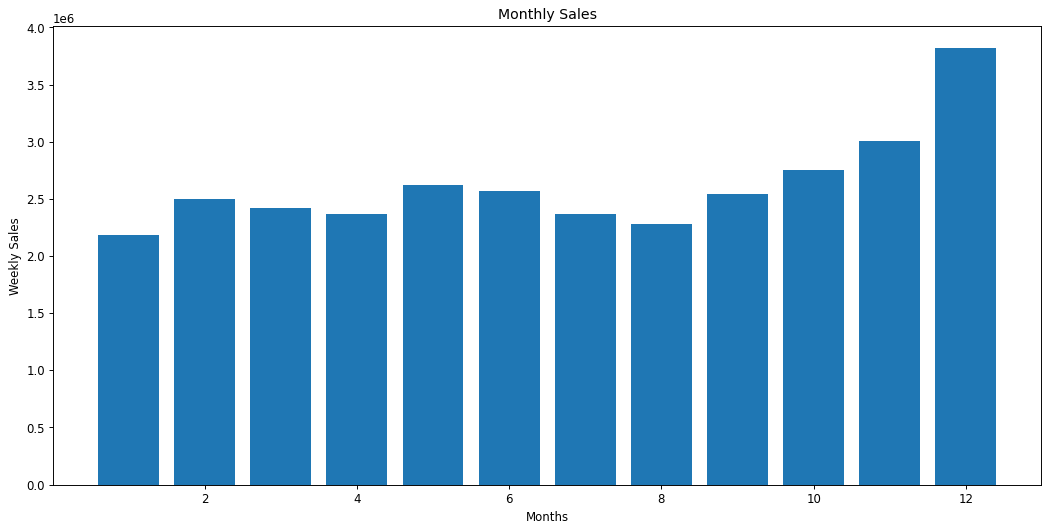

In [21]:
#monthly sales
plt.figure(figsize=(15,7), dpi=85)
plt.bar(df['month'],df['Weekly_Sales'])
plt.xlabel('Months') 
plt.ylabel('Weekly Sales')
plt.title('Monthly Sales')

In [22]:
#Semester Sales
df['semester'] = np.where(df['month']< 7, 1, 2)

In [23]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1


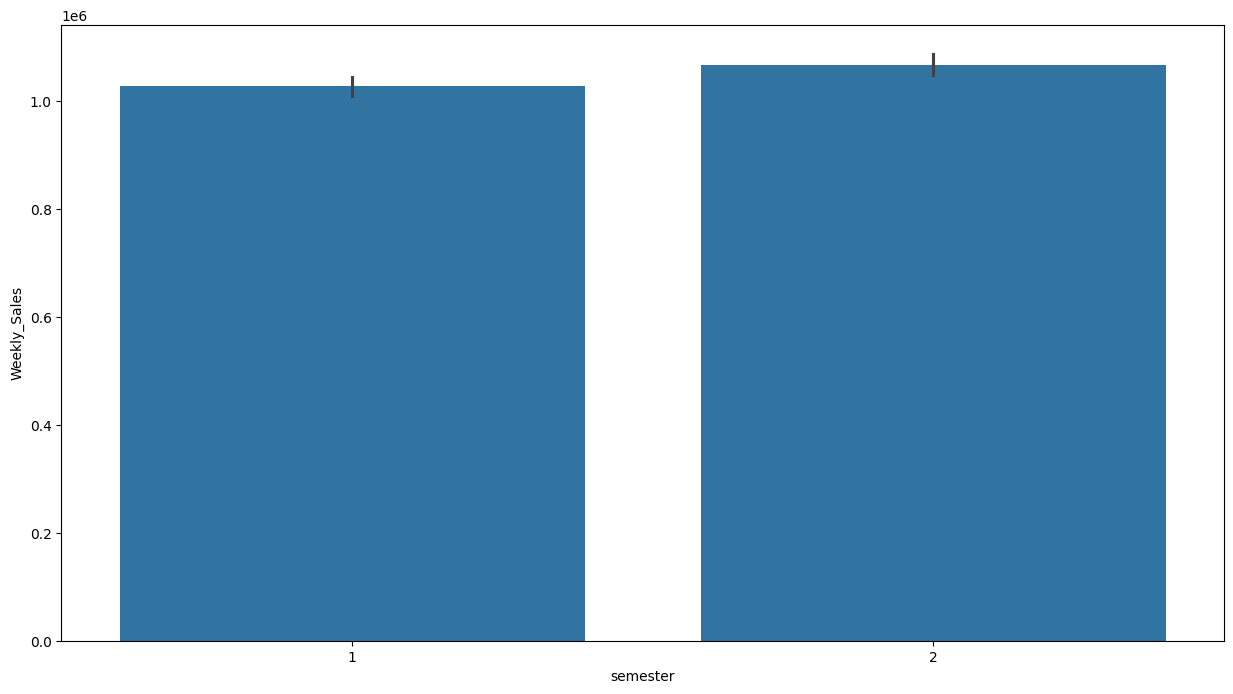

In [24]:
plt.figure(figsize =(15,8))
semester=sns.barplot(x='semester',y='Weekly_Sales',data=df)

From this data we can draw the insight that semester 2 had higher weekly sales while the month of December had the highest weekly sales.

In order to build a model for this we must define the dependent and independent variables. In this case, store, fuel price, CPI, Unemployement, Day, Month, and Year are independent variables. The dependent variable is Weekly Sales. Now we can start training the model and train 80% of the data and test on the 20% of the other data. 

In [25]:
#Define independent and dependent variable
# Select features and target 
x=df[['Store','Fuel_Price','CPI','Unemployment','day','month','year']]
y=df['Weekly_Sales']

In [29]:
from sklearn.model_selection import train_test_split
# Split data to train and test (0.80:0.20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Linear Regression:

Accuracy: 15.315028629083482
Mean Absolute Error: 448892.6893508966
Mean Squared Error: 300849750156.4908
Root Mean Squared Error: 548497.721195349


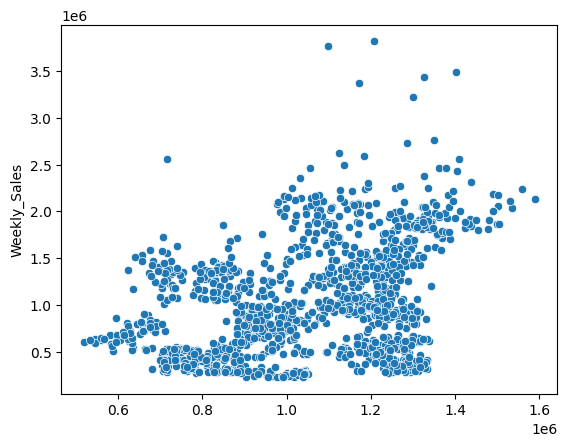

In [34]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Accuracy:',reg.score(x_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



sns.scatterplot(x=y_pred, y=y_test);

Random Forest Regressor:

Accuracy: 94.81170412359664
Mean Absolute Error: 68855.60302162831
Mean Squared Error: 17550052359.305553
Root Mean Squared Error: 132476.6106122343


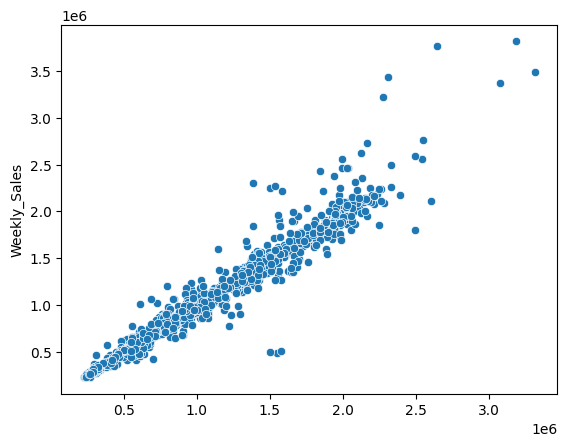

In [36]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('Accuracy:',rfr.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(x=y_pred, y=y_test);

After creating 2 different forecasting models we can see that the Random Forest Regression has an 94% accuracy and is more appropriate to use compared to the linear regression model

6) Change dates into days by creating new variable

In [37]:
df['day'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday,1


In [38]:
experiment_day_start=5
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['exp_day'] = (df['Date']-df['Date'].min()).dt.days + experiment_day_start

In [39]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester,exp_day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday,1,117
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday,2,331
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1,45
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1,52
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday,1,118


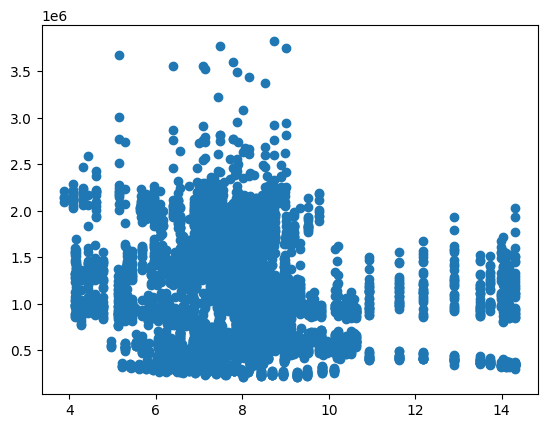

-0.1061760896579542


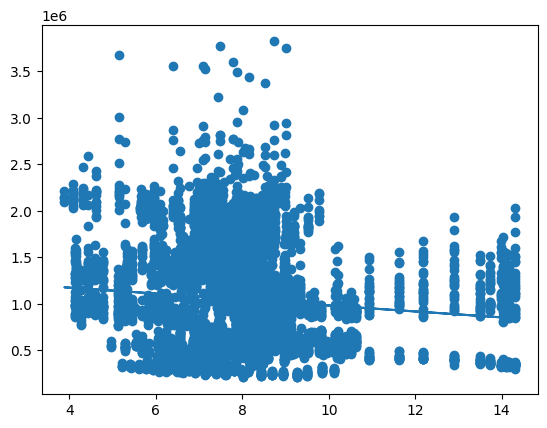

In [40]:
from sklearn.linear_model import LinearRegression
from scipy import stats
#Weekly sales vs Unemployment
x = df['Unemployment']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

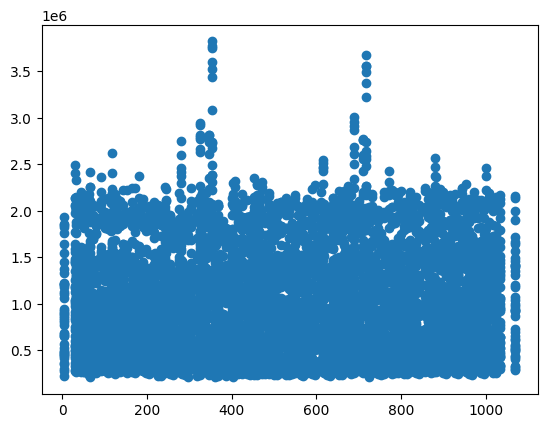

0.004591803306455442


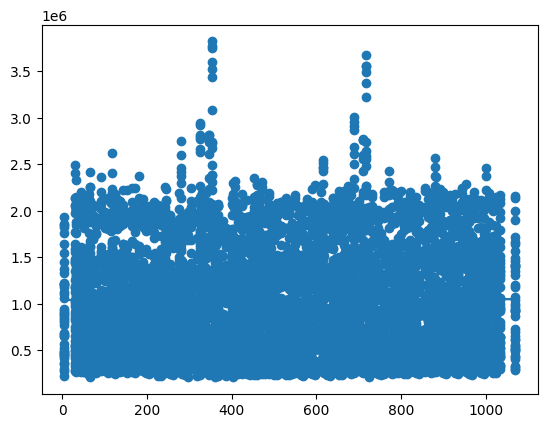

In [41]:
# Weekly_Sales vs exp_day
x = df['exp_day']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

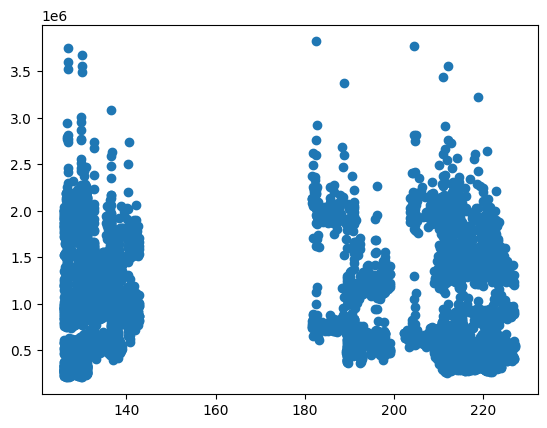

-0.0726341620401763


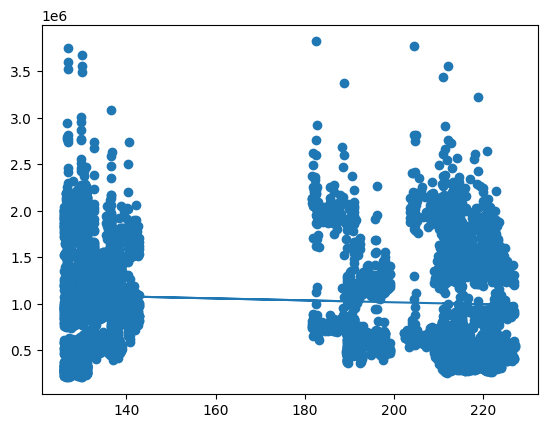

In [42]:
#Weekly sales vs CPI
x = df['CPI']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

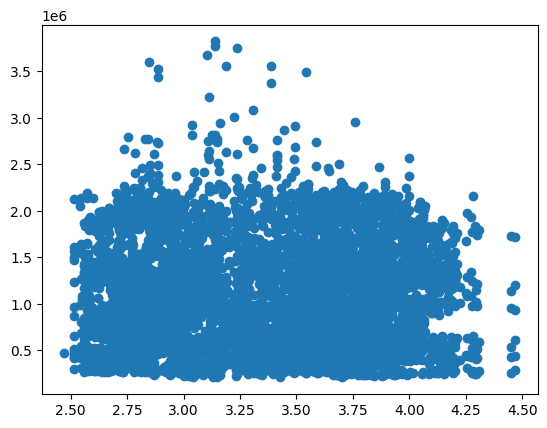

0.009463786314475132


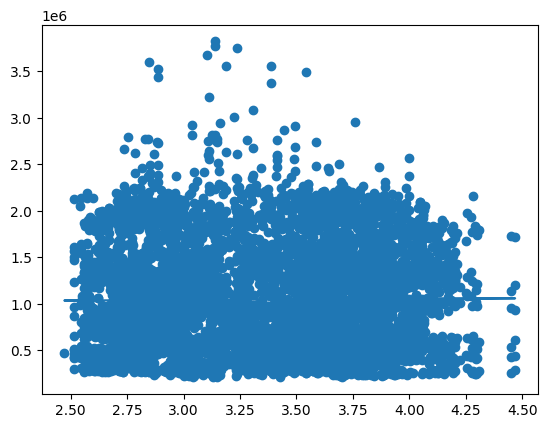

In [43]:
#Weekly sales vs Fuel price
x = df['Fuel_Price']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

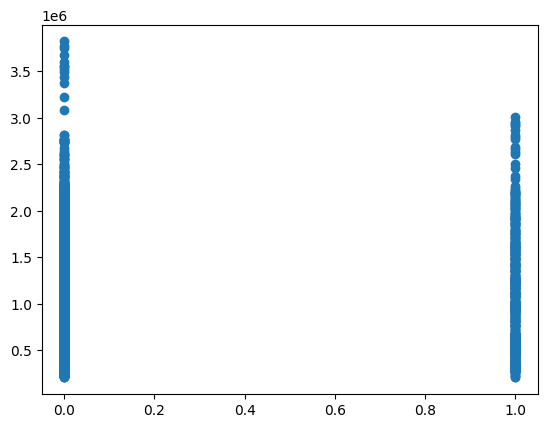

0.03689096801041451


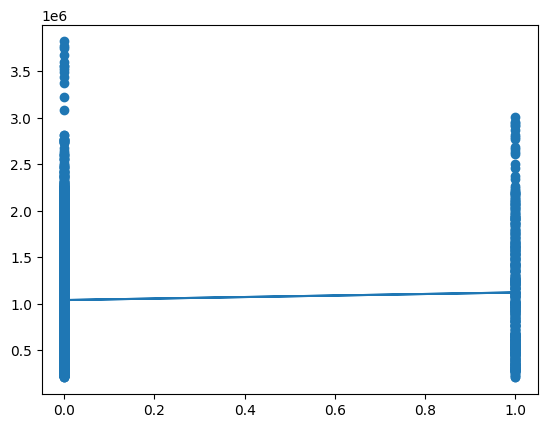

In [44]:
#Weekly sales vs Holidays
x = df['Holiday_Flag']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

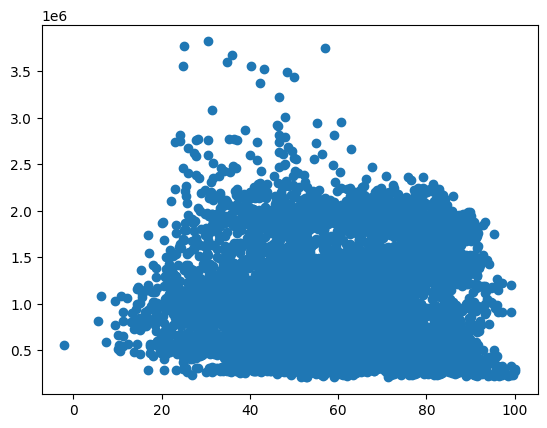

-0.06381001317946955


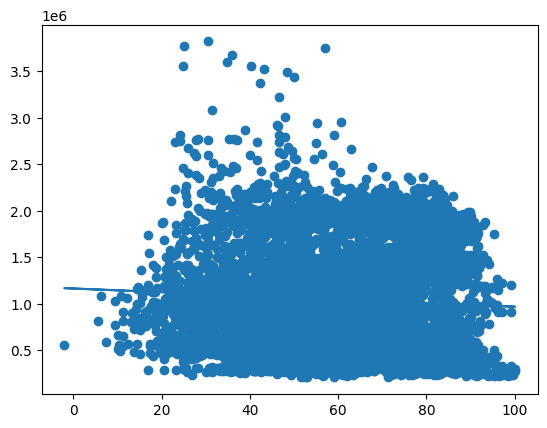

In [45]:
#Weekly sales vs Temperature
x = df['Temperature']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [50]:
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester,exp_day,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday,1,117,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday,2,331,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1,45,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1,52,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday,1,118,Monday
